In [18]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [20]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)

In [21]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [22]:
type(sc.flux.value)

numpy.ndarray

In [24]:
data_m = copy.deepcopy(data)
data_z = copy.deepcopy(data)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], 
                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)
#data_m.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
#                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='moffat', xc=[4.9, 4.5, 4.7],
#                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)

100%|██████████| 900/900 [01:46&lt;00:00,  8.43it/s]


In [ ]:
data_z.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='zernike', xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

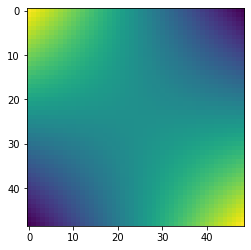

In [76]:
s = 49
zern = eleanor.models.Zernike((s,s),0,0)
x, y = zern.x - np.median(zern.x), zern.y - np.median(zern.y)
plt.imshow(zern.zernike(3).eval(session=sess) * (x ** 2 + y ** 2 < (s//2) ** 2))

[&lt;matplotlib.lines.Line2D at 0x7f800923b5b0&gt;]

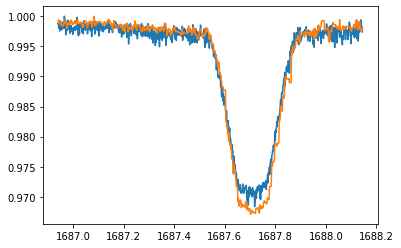

In [32]:
start_real = start+50
time = sc.time[sq][start_real:end]
photometry_flux = sc.to_lightcurve().flux[sq][start_real:end].value
plt.plot(time.value, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = np.sum(data.all_psf, axis=1)
plt.plot(time.value, psf_flux[start_real-start:end-start] / np.max(psf_flux[start_real-start:end-start]))

[&lt;matplotlib.lines.Line2D at 0x7f8008497160&gt;,
 &lt;matplotlib.lines.Line2D at 0x7f8008497250&gt;,
 &lt;matplotlib.lines.Line2D at 0x7f8008497310&gt;,
 &lt;matplotlib.lines.Line2D at 0x7f80084973d0&gt;,
 &lt;matplotlib.lines.Line2D at 0x7f8008497490&gt;]

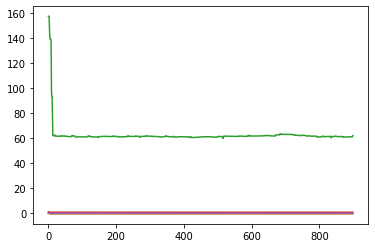

In [33]:
plt.plot(data.psf_params)

In [34]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

770.4013129712878 ppm
715.8758089481665 ppm
